# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Principal Component Analysis

> Creator: Matt Brems (DC)

### LEARNING OBJECTIVES
By the end of the lesson, students should be able to:
1. Differentiate between feature elimination and feature extraction.
2. Describe the PCA algorithm.
3. Identify use cases for PCA.
4. Implement PCA in `scikit-learn`.
5. Calculate and interpret proportion of explained variance.

### Introduction of Problem

Today, we're going to be using data from the [American Community Survey](https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml) (you can think of it as similar to the U.S. Census, but the ACS is administered more frequently than every ten years).

Specifically, we are going to look household data (how many households have married couples, how many households have children under 18, how many households have children under 6, etc. etc.) in 2016 and use these factors to predict the population in 2017.

In [1]:
import pandas as pd
import numpy as np

This next cell is a bit of data munging. I'll briefly summarize this, but you can check it out in more detail later if you'd like!

In [2]:
## Read in 2017 CA population data.
pop = pd.read_csv('./datasets/2017/ACS_17_1YR_S0101_with_ann.csv', header=1)

## Drop all columns except for county and population size.
pop = pop[['Geography', 'Total; Estimate; Total population']]

## Read in 2016 CA household data.
hh_2016 = pd.read_csv('./datasets/2016/ACS_16_1YR_S1101_with_ann.csv', header=1)

## Remove columns that contain margins of error, percentages, and IDs.
## American Community Survey and Census data usually have many, many columns.
hh_drop = [i for i in hh_2016.columns if 'Margin of Error' in i or 'Percent' in i]
hh_drop.append('Id')
hh_drop.append('Id2')
hh_2016.drop(columns=hh_drop, inplace = True)

## Merge the 2017 population data with the 2016 household data on county.
df = pd.merge(pop, hh_2016, how = 'inner', on = 'Geography')

## Rename Y column.
df.columns = ['pop_2017' if i == 'Total; Estimate; Total population' else i for i in df.columns]

## Set index to be the county.
df.set_index('Geography', inplace = True)

## Drop **columns** with NaN.
df.replace(to_replace = '(X)', value = np.nan, inplace = True)
df.dropna(axis = 1, how = 'any', inplace = True)

### Fit a multiple linear regression model in `sklearn`.
- Import Linear Regression.
- Set `y` to be the `pop_2017` column.
- Use all other columns as your `X`.

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
y = df['pop_2017']
X = df.drop(columns='pop_2017')

In [5]:
y.head()

Geography
Alameda County, California         1663190
Butte County, California            229294
Contra Costa County, California    1147439
El Dorado County, California        188987
Fresno County, California           989255
Name: pop_2017, dtype: int64

In [6]:
X.head()

,Total; Estimate; Total households,Married-couple family household; Estimate; Total households,"Male householder, no wife present, family household; Estimate; Total households","Female householder, no husband present, family household; Estimate; Total households",Nonfamily household; Estimate; Total households,Total; Estimate; Average household size,Married-couple family household; Estimate; Average household size,"Male householder, no wife present, family household; Estimate; Average household size","Female householder, no husband present, family household; Estimate; Average household size",Nonfamily household; Estimate; Average household size,...,Total; Estimate; HOUSING TENURE - Owner-occupied housing units,Married-couple family household; Estimate; HOUSING TENURE - Owner-occupied housing units,"Male householder, no wife present, family household; Estimate; HOUSING TENURE - Owner-occupied housing units","Female householder, no husband present, family household; Estimate; HOUSING TENURE - Owner-occupied housing units",Nonfamily household; Estimate; HOUSING TENURE - Owner-occupied housing units,Total; Estimate; HOUSING TENURE - Renter-occupied housing units,Married-couple family household; Estimate; HOUSING TENURE - Renter-occupied housing units,"Male householder, no wife present, family household; Estimate; HOUSING TENURE - Renter-occupied housing units","Female householder, no husband present, family household; Estimate; HOUSING TENURE - Renter-occupied housing units",Nonfamily household; Estimate; HOUSING TENURE - Renter-occupied housing units
Geography,,,,,,,,,,,,,,,,,,,,,
"Alameda County, California",572012,291642,27695,64059,188616,2.82,3.48,3.46,3.59,1.45,...,52.3,66.5,42.2,41.5,35.3,47.7,33.5,57.8,58.5,64.7
"Butte County, California",85531,36380,4018,10130,35003,2.57,3.28,3.40,3.32,1.53,...,59.1,79.7,44.4,37.4,45.8,40.9,20.3,55.6,62.6,54.2
"Contra Costa County, California",391288,215875,21354,47582,106477,2.88,3.45,3.46,3.49,1.32,...,64.0,74.6,46.4,47.8,53.4,36.0,25.4,53.6,52.2,46.6
"El Dorado County, California",69653,39436,3162,6242,20813,2.64,3.08,3.40,3.81,1.34,...,75.0,83.3,68.2,51.7,67.2,25.0,16.7,31.8,48.3,32.8
"Fresno County, California",303216,141938,24769,52953,83556,3.18,3.85,3.91,3.89,1.37,...,52.9,67.7,43.1,34.8,42.1,47.1,32.3,56.9,65.2,57.9


In [7]:
lm = LinearRegression()

In [8]:
model = lm.fit(X,y)

/Users/mattbrems/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [9]:
model.coef_

array([ 1.63049572e+00,  7.35228668e-02,  1.00932739e+01, -6.97644527e+00,
       -1.55986031e+00,  3.17697379e+03,  3.26390428e+03,  5.56021573e+03,
        4.13558621e+03,  1.35393553e+03,  3.19035162e+00,  7.35229177e-02,
        1.00932738e+01, -6.97644526e+00,  3.53868100e+03,  3.29734293e+03,
        5.02570843e+03,  4.69442232e+03, -4.07531073e+00, -6.12405209e-01,
       -2.95953837e+01,  2.61324782e+01, -8.55777909e+03,  7.14649722e+03,
        2.50569157e+03,  2.19293724e+03,  1.33766551e+03,  2.49857568e+02,
       -7.65200647e+02, -1.42458385e+03,  8.46479983e+03, -8.59560489e+03,
       -1.71761226e+03, -4.16544194e+02,  1.63049118e+00,  7.35229178e-02,
        1.00932738e+01, -6.97644526e+00, -1.55986026e+00, -9.67116374e+03,
        6.21639372e+03,  3.58120974e+03,  1.52870660e+03, -6.48887689e+03,
       -5.75892340e+03, -1.90064737e+03,  3.03108995e+03,  5.56551911e+03,
       -3.24055577e+03, -3.95773383e+03, -2.84827931e+03, -3.70090594e+03,
        1.04034118e+04,  

In [10]:
model.score(X,y)

1.0

<details><summary>**Check:** What is the problem with this?</summary>
- We have more columns than we have rows! We will be able to come up with a perfect fit for our model, but our model probably isn't actually perfect!
</details>

<details><summary>**Check:** How can we overcome this problem?</summary>
- We can drop features from our model. (However, this loses any benefit we'd get from dropping those features!)
- Maybe we can combine features together so that we can get the benefits of most/all of our features. (This is what PCA will do.)
</details>

### Dimensionality Reduction

Dimensionality reduction refers to **reducing the dimension of our feature space**. Less technically, this is (approximately) the number of features we use in our model.

#### Dimensionality reduction has a number of advantages:
- Increases computational efficiency when fitting models.
- Can help with addressing a multicollinearity problem.
- Makes visualization simpler (or feasible).

#### Dimensionality reduction can suffer from some drawbacks, though:
- We've invested our time and money into collecting information... why do we want to get rid of it?

Dimensionality reduction can generally be broken down into one of two categories:
- **Feature Elimination**
    - In feature elimination, we drop variables from our model.
- **Feature Extraction**
    - In feature extraction, we take our existing features and combine them together in a particular way. We can then drop some of these "new" variables, but the variables we keep are still a combination of the old variables!
    - This allows us to still reduce the number of features in our model **but** we can keep all of the most important pieces of the original features!

### $$
\begin{eqnarray*}
X_1, \ldots, X_p &\Rightarrow& Z_1, \ldots, Z_p \\
\\
\text{most important: }Z_1 &=& w_{0,1} + w_{1,1}X_1 + \cdots + w_{p,1}X_p \\
\text{slightly less important: }Z_2 &=& w_{0,2} + w_{1,2}X_1 + \cdots + w_{p,2}X_p \\
\text{least important: }Z_p &=& w_{0,p} + w_{1,3}X_1 + \cdots + w_{p,3}X_p
\end{eqnarray*}
$$

You can think of $Z_1$ as a **high performance predictor** (not a real term), where $Z_1$ has all of the best pieces of $X_1$ through $X_p$. As we move down the list toward $Z_p$, the variables will consist of the more "redundant" parts of our $X$ variables.
- Remember the "sweet potato" analogy, where variables all get in line to take a bite of the variability in our data? And then once that bite is gone, no other variable can take that bite (a.k.a. explain that variability)? $Z_1$ consists of the parts of $X_1$ through $X_p$ that all get their own chunk of the sweet potato. On the other hand, $Z_p$ will consist of the redundant pieces.

Dimensionality reduction can be used as an exploratory/unsupervised learning method or as a pre-processing step for supervised learning later.

**Principal component analysis** is a method used for feature extraction.

## Principal Component Analysis

### Big picture, what is PCA doing?
1. We are going to look at how all of the $X$ variables relate to one another, then summarize these relationships.
2. Then, we will take this summary and look at which combinations of our $X$ variables are most important.
3. We can also see exactly how important each combination is, then rank these combinations.

Once we've taken our original $X$ data and transformed it into $Z$, we can then drop the columns of $Z$ that are "least important."

---

**Essentially...**

- PCA finds *linear combinations* of current predictor variables that...
- create new "principal components". The principal components explain...
- the maximum possible amount of variance in your predictors.

$$ PC_1 = w_{1,1}X_1 + w_{2,1}X_2 + \cdots + w_{p,1}X_p $$

$$ PC_2 = w_{1,2}X_1 + w_{2,2}X_2 + \cdots + w_{p,2}X_p $$

$$ PC_3 = w_{1,3}X_1 + w_{2,3}X_2 + \cdots + w_{p,3}X_p $$

This is cool because...

- $PC1$ is better than $PC2$ is "better" than $PC3$  
- All of these are *uncorrelated*

---

**Visually...**

> Think of our data floating out in $p$-dimensional space. Each observation is a dot and you can imagine this massive cloud of dots that exists somewhere. PCA is a way to rotate this cloud of dots (formally, a coordinate transformation). The old axes are the original features. The new axes are the principal components from PCA.

**The new axes (principal components) become the most concise, informative descriptors of our data as a whole.**

Let's head to [this site](http://setosa.io/ev/principal-component-analysis/). Play around with the 2D data. Take 2-3 minutes.
1. As you interact with the data, how would you describe the red line?
2. As you interact with the data, how would you describe the green line?

---

### Principal Components

- We are looking for new *directions* in feature space
- Each consecutive direction tries to maximize *remaining variance*
- Each direction is *orthogonal* to all the others

**These new *directions* are the "principal components", i.e. the new coordinate system for your data.**

> Applying PCA to your data *transforms* your original data columns (variables) onto the new principal component axes.


### One note:
You will do your train/test split **before** applying PCA!
- Otherwise, your test set would affect the transformation we apply to the training set.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
pca = pca.fit(X_train)

In [13]:
Z_train = pca.transform(X_train)

In [14]:
Z_test = pca.transform(X_test)

<details><summary>**Check:** Suppose I ran `sns.pairplot(X_train)` and `sns.pairplot(Z_train)`. Given what we know about PCA, how would they be different?</summary>
`X_train` is the original data and `Z_train` is the transformed data. Since the columns of `Z_train` are uncorrelated, we should see no linear relationships between any of the images in that plot! (The line of best fit should be flat.)
</details>

### Warning: Uncomment and run the next cell **if you have time.** This will take a few minutes to render.

In [15]:
# import seaborn as sns
# sns.pairplot(X_train)
# sns.pairplot(Z_train)

### So, like, big picture, what is PCA doing?
Well, we're transforming our data. Specifically, we are:
1. We are going to look at how all of the $X$ variables relate to one another, then summarize these relationships. (This is done with the **covariance matrix**.)
2. Then, we will take this summary and look at which combinations of our $X$ variables are most important. (We will decompose our covariance matrix into its **eigenvectors**, which is a linear algebra term that allows us to understand the most important "directions" in our data, which are our principal components!)
3. We can also see exactly how important each combination is, then rank these combinations. (With each eigenvector, we get an **eigenvalue**. This eigenvalue is a number that tells us how important each "direction" or principal component is.)

Remember that one of our goals with PCA is to do dimensionality reduction (a.k.a. get rid of features).

We can measure how important each principal component is using the eigenvalue, rank the columns of `Z_train` by their eigenvalues, and then drop the columns with small eigenvalues (little importance) but keep the columns with big eigenvalues (very important).
- In `sklearn`, when transformed by PCA, the columns will already be sorted by their eigenvalues from biggest to smallest! The first column will be the most important, the second column will be the next most important, and so on.

#### Capturing variance

The total variance of your data gets redistributed among the principal components:

$$\text{var}(PC1) > \text{var}(PC2) > \text{var}(PC3) > \cdots$$

#### But how many features do we discard?

A useful measure is the **proportion of explained variance**, which is calculated from the **eigenvalues**. 

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ \text{explained variance of }PC_k = \bigg(\frac{\text{eigenvalue of } PC_k}{\sum_{i=1}^p\text{eigenvalue of } PC_i}\bigg)$$

Rather than write out "$\text{eigenvalue of } PC_k$", we usually just write $\lambda_k$.

If I want to calculate the proportion of explained variance by retaining $PC_1$ and $PC_2$, I would calculate this as:

### $$ \text{explained variance of } PC_1 \text{ and } PC_2 = \bigg(\frac{\lambda_1 + \lambda_2}{\sum_{i=1}^p \lambda_i} \bigg)$$

In [16]:
var_exp = pca.explained_variance_ratio_
print('Explained variance:            ', var_exp)

cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)

Explained variance:             [9.96814533e-01 2.50124721e-03 6.49183241e-04 2.48367282e-05
 7.73076365e-06 2.27107499e-06 1.97213881e-07 3.89159196e-10
 2.22553729e-10 1.01191351e-10 8.86514643e-11 6.57650479e-11
 5.36700095e-11 4.83962817e-11 2.75344090e-11 2.30238978e-11
 1.53447839e-11 1.19297463e-11 8.49394323e-12 6.27069974e-12
 5.51127755e-12 3.66657312e-12 2.09540250e-12 1.43371879e-12
 3.30890369e-13 1.22587946e-32]
Cumulative explained variance:  [0.99681453 0.99931578 0.99996496 0.9999898  0.99999753 0.9999998
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


<details><summary>**Check:** If I wanted to explain at least 99.9% of the variability in my data with principal components, what is the smallest number of principal components that I would need to keep? </summary>
Only two!! I could keep $Z_1$ and $Z_2$, and this would explain 99.931578% of the variability in my data.
</details>

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

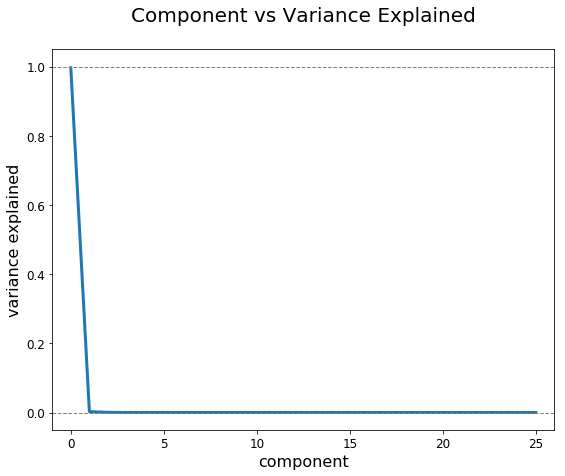

In [18]:
plt.figure(figsize=(9,7))

# HERE IS THE BASIC PLOT

# Plot the explained variance
component_number = range(len(var_exp))
plt.plot(component_number, var_exp, lw=3)

# NOW MAKE IT LOOK PRETTY

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-1,26])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Variance Explained\n', fontsize=20)

plt.show()

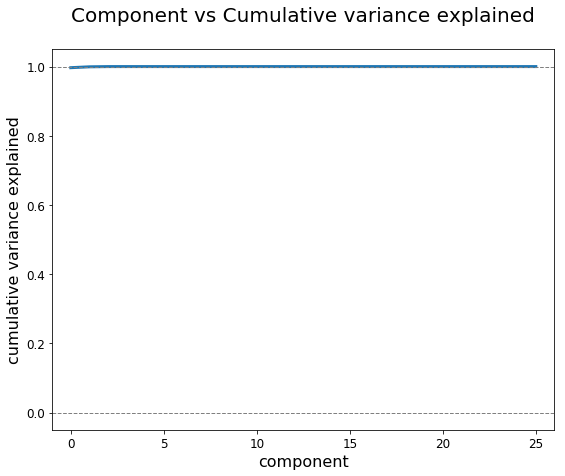

In [19]:
plt.figure(figsize=(9,7))

# HERE IS THE BASIC PLOT

# Plot the cumulative explained variance
component_number = range(len(cum_var_exp))
plt.plot(component_number, cum_var_exp, lw=3)

# NOW MAKE IT LOOK PRETTY

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-1,26])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Cumulative variance explained\n', fontsize=20)

plt.show()

## Let's compare our PCA'ed performance to our original performance!

In [20]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

0.8984011875373273

In [21]:
lm = LinearRegression()
lm.fit(Z_train, y_train)
lm.score(Z_test, y_test)

0.8984011875373265

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca = pca.fit(X_train)

In [23]:
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)
lm = LinearRegression()
lm.fit(Z_train, y_train)
lm.score(Z_test, y_test)

0.9831815381868694

**Two assumptions that PCA makes:**
1. **Linearity:** PCA detects and controls for linear relationships, so we assume that the data does not hold nonlinear relationships.
    - We are using our covariance matrix to determine important "directions," which is a measure of the linear relationship between observations!
2. **Large variances define importance:** If data is spread in a direction, that direction is important! If there is little spread in a direction, that direction is not very important.
    - That aligns with what we saw [here](http://setosa.io/ev/principal-component-analysis/).

### Potential Use Cases for PCA
- Image Processing (we'll learn other methods of dealing with these later, too)
- 20+ Variables with High Multicollinearity
- 100+ Variables
- Situations where $n < p$.

### LEARNING OBJECTIVES
By the end of the lesson, students should be able to:
1. Differentiate between feature elimination and feature extraction.
2. Describe the PCA algorithm.
3. Identify use cases for PCA.
4. Implement PCA in `scikit-learn`.
5. Calculate and interpret proportion of explained variance.